In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import copy

In [2]:
LANGUAGES = ['English', 'Ganda', 'French', 'Gujarati', 'Indonesian' ,'Korean', 'Russian']
BASE_PATH = "Data"
TRANSFORMATION_TYPES = ["Amplitude", "Clipping", "Drop", "Frame", "HP", "LP", "Noise", "Scale"]
GROUPS = LANGUAGES

In [3]:
ASR_TYPES = ["GCP", "IBM", "MS Azure"]
DATASET_TYPE = "Accents"
SAVE_FOLDER = "/Users/sakshiudeshi/Documents/SUTD/Research/LaTeX/speechPaper/figs/"
# SAVE_FOLDER = "Saved_Imgs/"

In [4]:
def get_filename_filler():
    return " Word Counts - Average"

In [5]:
def process_num_arr(num_arr):
    tag = str(num_arr[0])
    num_arr = num_arr[1:len(num_arr)]
    return [float(i) for i in num_arr], tag

In [6]:
def get_file_data(asr_type):
    file_name = BASE_PATH + "/" + asr_type + \
    get_filename_filler() + ".csv"
    with open(file_name, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        file_arr = list(reader)[2:]
    return file_arr, asr_type

In [7]:
def get_asr_type_data_subset(error_data_nuggets, asr_type):
    error_data_nuggets_subsets = []
    for data in error_data_nuggets:
        if data.asr_type == asr_type:
            error_data_nuggets_subsets.append(data)
    return error_data_nuggets_subsets

In [8]:
# def get_asr_gr_type_subset(error_data_nuggets, gr_val = 0):
#     error_data_nuggets_subsets = []
#     for data in error_data_nuggets:
#         error_data_nuggets_subsets.append(error_data_nugget(data.asr_type, 'ALL', [data.error_sum_row[gr_val]]))
#     return error_data_nuggets_subsets

In [9]:
def get_asr_tr_type_subset(error_data_nuggets, tr_type = "Noise"):
    error_data_nuggets_subsets = []
    
    for data in error_data_nuggets:
        if data.transformation_type == tr_type:
            error_data_nuggets_subsets.append(data)    
    return error_data_nuggets_subsets

In [10]:
def get_data_nugget_subset_average(error_data_nuggets, axis = 0):
    data_arr = []
    for data in error_data_nuggets:
        data_arr.append(data.error_row)
        
    return (np.mean(data_arr, axis = axis))

In [11]:
def autolabel(rects):
    
    
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        text_height = height + max(0.02*height, 0.05)
            
        ax.text(rect.get_x() + rect.get_width()/2., text_height,
                '%.2f' % float(height),
                ha='center', va='bottom', rotation="vertical")

In [12]:
class error_data_nugget:
    def __init__(self, asr_type, transformation_type, error_row):
        self.asr_type = asr_type
        self.transformation_type = transformation_type
        self.error_row = error_row

In [13]:
def make_error_data_nuggets():
    error_data_nuggets = []
    for asr_type in ASR_TYPES:
        file_arr, asr = get_file_data(asr_type)
        for num_arr_raw in file_arr:
            num_arr, transformation_type = process_num_arr(num_arr_raw)
            error_data_nuggets.append(error_data_nugget(asr_type, transformation_type, num_arr))
    
    return error_data_nuggets

In [14]:
error_data_nuggets = make_error_data_nuggets()
error_data_nuggets_subset = get_asr_tr_type_subset(error_data_nuggets)
print(get_data_nugget_subset_average(error_data_nuggets_subset))
for nugget in error_data_nuggets_subset:
    print(nugget.asr_type, nugget.transformation_type, nugget.error_row)

[0.56969697 1.6        0.85454545 1.27272727 0.70909091 1.73939394
 1.53939394]
GCP Noise [0.8363636364, 1.490909091, 1.363636364, 1.690909091, 0.9454545455, 1.818181818, 1.981818182]
IBM Noise [0.4363636364, 2.145454545, 0.6727272727, 1.290909091, 0.8545454545, 2.127272727, 1.545454545]
MS Azure Noise [0.4363636364, 1.163636364, 0.5272727273, 0.8363636364, 0.3272727273, 1.272727273, 1.090909091]


In [15]:
def get_percentages(sum_arrs, base_gr = 0):
    p_sum_arrs = []
    for sum_arr in sum_arrs:
        p_sum_arr = []
        for i, val in enumerate(sum_arr):
            if i != base_gr:
                try:
                    p_sum_arr.append(( val - sum_arr[base_gr]) * 100/sum_arr[base_gr])
                except ZeroDivisionError:
                    p_sum_arr.append(np.inf)
        p_sum_arrs.append(p_sum_arr)
        
    return p_sum_arrs

29.760218446135127
[(11.922596757484841, 'GCP'), (57.32600731200015, 'IBM'), (20.032051268920394, 'MS Azure')]
87.2527472393679
[24.719101129995163, 1.0299626320880394e-09, -3.745318342605113, -11.985018721673402, 27.715355800371356, 34.831460677791085]
[87.2527472393679, 33.18681316354645, 30.549450534086386, 43.29670330402617, 85.71428569473781, 63.956043936236235]
[39.423076905058025, -14.423076931698635, 1.923076906809815, -24.519230775214616, 84.61538458766088, 33.17307692090688]


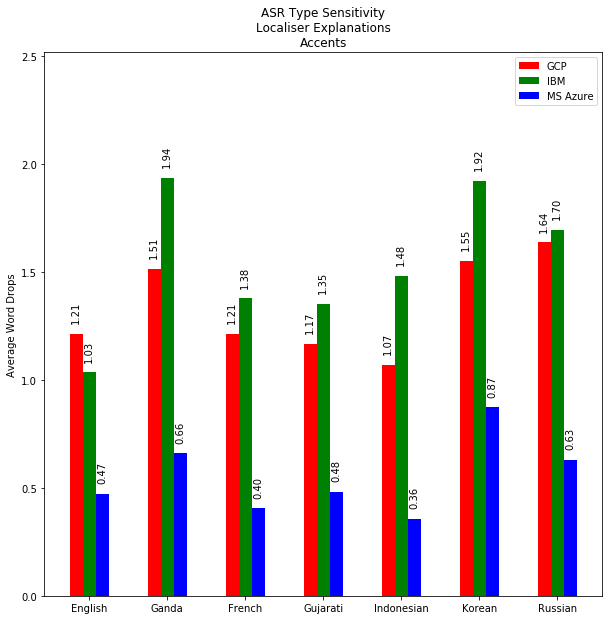

In [16]:
## ASR_TYPE vary plots
width = 0.25
# spacing = 0.2
colors = ['r', 'g', 'b', 'y']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
# print(ind + width*i)

rects = []

sum_arrs = []
for i, asr_type in enumerate(ASR_TYPES):
    error_data_nuggets_subset = get_asr_type_data_subset(error_data_nuggets, asr_type = asr_type)
    sum_arr = (get_data_nugget_subset_average(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(GROUPS, sum_arr)

for rect in rects:
    autolabel(rect)
    
print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), ASR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    
plt.ylim(top = np.max(sum_arrs) *1.3)



ax.legend((rect for rect in rects), (asr_type for asr_type in ASR_TYPES))
ax.set_xticks(ind + width * 1)
ax.set_xticklabels( GROUPS)
ax.set_ylabel('Average Word Drops')
plt.title ("ASR Type Sensitivity\nLocaliser Explanations\n" + DATASET_TYPE)
plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Localiser-ASR-1-Errors",bbox='tight', dpi=300)

plt.show()


[0.5 2.  3.5 5.  6.5 8.  9.5]
93.14780456675545
[(28.98989896239057, 'Clipping'), (154.42176870446687, 'Drop'), (96.03174603340892, 'Frame')]
285.71428563250726
[26.6666666288889, 6.06060603065657, 29.999999978333314, 14.545454535909093, 40.30303027661618, 56.36363632393938]
[242.8571429116618, 75.51020407934195, 81.63265306511865, 91.83673469685543, 285.71428563250726, 148.97959184131605]
[133.33333339444445, 79.36507934346182, 47.6190476165533, 33.33333333333333, 211.11111107910054, 71.4285714335601]


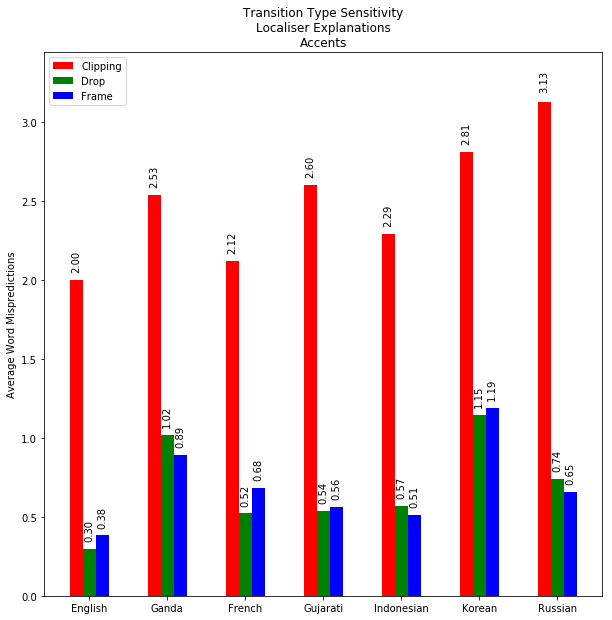

In [17]:
## Tr_Type vary plots where English does very well
width = 0.25
# spacing = 0.2
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5

TR_TYPES = ["Clipping", "Drop", "Frame"]


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
print(ind + width*i)

rects = []

sum_arrs = []
for i, trans_type in enumerate(TR_TYPES):
    error_data_nuggets_subset = get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type)
    sum_arr = (get_data_nugget_subset_average(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(LANGUAGES, sum_arr)

for rect in rects:
    autolabel(rect)
    
plt.ylim(top = np.max(sum_arrs) *1.1)

print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    



ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
ax.set_xticks(ind + width )
ax.set_xticklabels(GROUPS)
ax.set_ylabel('Average Word Mispredictions')
plt.title ("Transition Type Sensitivity\nLocaliser Explanations\n" + DATASET_TYPE)
plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Localiser-Transition-1-Errors",bbox='tight', dpi=300)

plt.show()


[0.5 2.  3.5 5.  6.5 8.  9.5]
69.0459244815171
[(125.70921984614269, 'Noise'), (12.382629116891499, 'LP')]
205.31914890604347
[180.85106381186063, 50.00000001170211, 123.40425531765509, 24.468085100033953, 205.31914890604347, 170.2127659295609]
[29.22535210951202, 10.563380285399735, 3.87323944082026, -8.09859153483931, 14.78873239878497, 23.9436620016713]


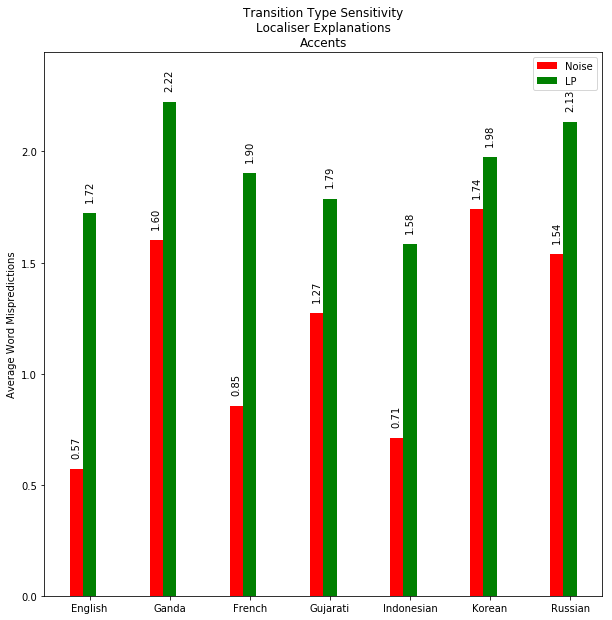

In [18]:
## Tr_Type vary plots where English does very well
width = 0.25
# spacing = 0.2
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5

TR_TYPES = ["Noise", "LP"]


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
print(ind + width*i)

rects = []

sum_arrs = []
for i, trans_type in enumerate(TR_TYPES):
    error_data_nuggets_subset = get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type)
    sum_arr = (get_data_nugget_subset_average(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(LANGUAGES, sum_arr)

for rect in rects:
    autolabel(rect)
    
plt.ylim(top = np.max(sum_arrs) *1.1)

print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    



ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
ax.set_xticks(ind + width )
ax.set_xticklabels(GROUPS)
ax.set_ylabel('Average Word Mispredictions')
plt.title ("Transition Type Sensitivity\nLocaliser Explanations\n" + DATASET_TYPE)
plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Localiser-Transition-2-Errors",bbox='tight', dpi=300)
plt.show()


[0.25 1.75 3.25 4.75 6.25 7.75 9.25]
-13.243456548737184
[(-21.428571428197284, 'Amplitude'), (-27.18579233331067, 'HP'), (8.883994115296398, 'Scale')]
37.44493391974423
[-10.714285709515323, -35.7142857095153, -32.14285715015306, -64.28571429244897, 17.85714285770407, -3.5714285652551023]
[1.639344303940454, -49.18032785907484, -70.49180327202231, -33.60655734897642, -13.93442623410878, 2.4590164103778904]
[29.955947126103727, 3.083700419213441, -34.36123349083914, 11.894273126878069, 37.44493391974423, 5.286343590678056]


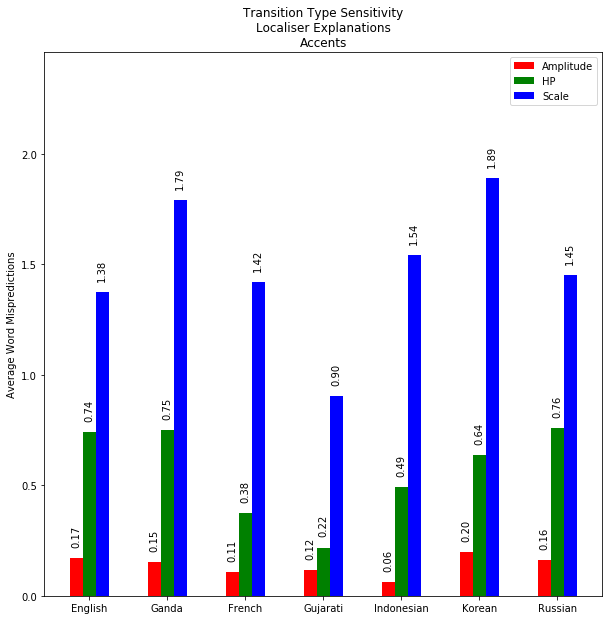

In [19]:
## Tr_Type vary plots where English does very well
width = 0.25
# spacing = 0.2
colors = ['r', 'g', 'b', 'y', 'c', 'm', 'k', 'tab:orange']
tau_vals = [0.01, 0.05, 0.1, 0.15]
step_size = 1.5

TR_TYPES = ["Amplitude", "HP", "Scale"]


fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

N = len(GROUPS)
ind = np.arange(N * step_size, step = step_size) 
print(ind + width*i)

rects = []

sum_arrs = []
for i, trans_type in enumerate(TR_TYPES):
    error_data_nuggets_subset = get_asr_tr_type_subset(error_data_nuggets, tr_type = trans_type)
    sum_arr = (get_data_nugget_subset_average(error_data_nuggets_subset))
    sum_arrs.append(sum_arr)

# print(sum_arrs)
    
    rects.append(ax.bar(ind + width*i, sum_arr, width = width, color=colors[i]))
#     plt.bar(LANGUAGES, sum_arr)

for rect in rects:
    autolabel(rect)
    
plt.ylim(top = np.max(sum_arrs) *1.3)

print(np.mean (get_percentages(sum_arrs)))
print([(np.mean(p_sum_arr[0]), p_sum_arr[1]) for p_sum_arr in zip(get_percentages(sum_arrs), TR_TYPES)])
print(np.max(get_percentages(sum_arrs)))
for p_sum_arr in get_percentages(sum_arrs):
    print(p_sum_arr)
    



ax.legend((rect for rect in rects), (trans_type for trans_type in TR_TYPES))
ax.set_xticks(ind + width )
ax.set_xticklabels(GROUPS)
ax.set_ylabel('Average Word Mispredictions')
plt.title ("Transition Type Sensitivity\nLocaliser Explanations\n" + DATASET_TYPE)
plt.savefig(SAVE_FOLDER + DATASET_TYPE + "-Localiser-Transition-3-Errors",bbox='tight', dpi=300)

plt.show()
